# Generating Adversarial Examples

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import sklearn.neighbors as knn

In [2]:
# Repeatable seed
random_state = 2**12
np.random.seed(seed=random_state)

In [3]:
# The AND logic has 4 possible outcomes: 0^0=0, 0^1=0, 1^0=0, 1^1=1
# Since the state can only be 0 or 1, I populate the sample with Logistic Distribution
n = 1000
mean, scale = 0.5, 0.15
x1 = np.random.logistic(mean, scale, n)
x2 = np.random.logistic(mean, scale, n)
x = np.column_stack((x1, x2))

In [4]:
def get_y(inputs):
    """Compute y based on AND logic
    """
    return np.array([1 if x[0] >= 0.5 and x[1] >= 0.5 else 0 for x in inputs])

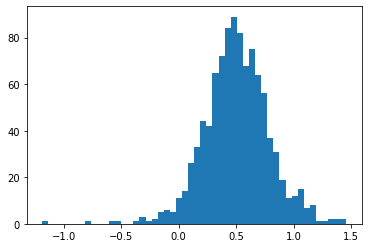

In [5]:
plt.figure()
count, bins, ignored = plt.hist(x1, bins=50)
plt.show()

In [6]:
y = get_y(x)

In [7]:
# Increasing the size of the plots
figsize = np.array(plt.rcParams["figure.figsize"]) * 2

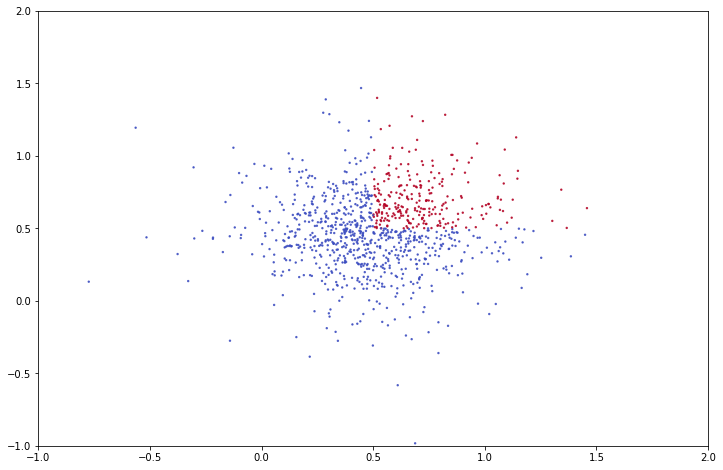

In [8]:
x_min, x_max = -1.0, 2

plt.figure(figsize=figsize.tolist())
plt.scatter(x[:, 0], x[:, 1], marker='.', c=y, alpha=0.8, cmap=plt.cm.coolwarm, s=8, edgecolor='face')
plt.grid(False)
plt.xlim(x_min, x_max)
plt.ylim(x_min, x_max)
plt.show()

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [10]:
# SVM
gamma = 10.0
C = 1000
model_svm1 = svm.SVC(kernel='rbf', decision_function_shape='ovo', random_state=random_state, gamma=gamma, C=C)
model_svm1.fit(x_train, y_train)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma=10.0, kernel='rbf',
    max_iter=-1, probability=False, random_state=4096, shrinking=True,
    tol=0.001, verbose=False)

In [11]:
print(f'With gamma = {gamma} and C = {C}')

y_pred = model_svm1.predict(x_train)
score = accuracy_score(y_train, y_pred)
print(f'Accuracy on train set = {score*100:.4f}%')

y_pred = model_svm1.predict(x_test)
score = accuracy_score(y_test, y_pred)
print(f'Accuracy on test set = {score*100:.4f}%')

With gamma = 10.0 and C = 1000
Accuracy on train set = 99.2500%
Accuracy on test set = 97.5000%


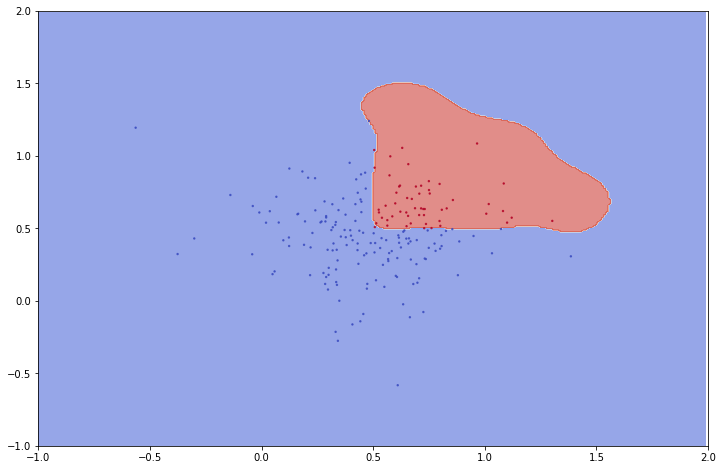

In [12]:
h = .01
# by symmetry x and y axis should be in same range
# x_min, x_max = x_test[:, 0].min() - 1, x_test[:, 0].max() + 1
x_min, x_max = -1.0, 2

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(x_min, x_max, h))
Z = model_svm1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=figsize.tolist())
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.6)
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, marker='.', alpha=0.8, cmap=plt.cm.coolwarm, s=8, edgecolor='face')
plt.xlim(x_min, x_max)
plt.ylim(x_min, x_max)
plt.show()

## Creating Adversarial Examples

In [13]:
ind_train_pos = np.where(y_train == 1)
x_train_pos = x_train[ind_train_pos]
y_train_pos = np.ones(len(x_train_pos))

ind_train_neg = np.where(y_train == 0)
x_train_neg = x_train[ind_train_neg]
y_train_neg = np.zeros(len(x_train_neg))

mu_train_pos = np.mean(x_train_pos, axis=0)
mu_train_neg = np.mean(x_train_neg, axis=0)

print(f'Positive mean = [{mu_train_pos[0]:.4f}, {mu_train_pos[1]:.4f}]')
print(f'Negative mean = [{mu_train_neg[0]:.4f}, {mu_train_neg[1]:.4f}]')

Positive mean = [0.7177, 0.7129]
Negative mean = [0.4352, 0.4292]


In [14]:
print(f'# of test samples = {len(x_test)}')

# of test samples = 200


In [29]:
# Expecting 50 test samples
test_size = 50 / len(x_test) * 1.0
_, x_subset, _, y_subset = train_test_split(x_test, y_test, test_size=test_size, random_state=random_state)
print(*x_subset[range(5)], sep='\n')
print(*y_subset[range(5)], sep=', ')
print(f'{len(y_subset[y_subset==1])} out of {len(y_subset)} are in positive class')

[0.50175787 0.46608707]
[0.28572323 0.54768529]
[0.21708793 0.17703638]
[0.3768108  0.43851731]
[0.05795497 0.20302078]
0, 0, 0, 0, 0
15 out of 50 are in positive class


In [ ]:
def get_not_y(y):
    return target = np.array(np.logical_not(y), dtype=np.int)

In [38]:
def moving_mean(x, y, targets, means, epsilon):
    """Generating Adversarial Examples which generated by moving x toward to another class
    
    Parameters
    ----------
    x: array-like matrix
        Each sample represents as a row vector

    y: array of integers
        Expected labels
    
    targets: array of integers
        Targetted class. For binaray classification problem, ignore this parameter.
        TODO: Multi-class implementation is NOT implemented.
        
    means: dictionary
        Means for each class, in format: {<class_label>:<mean>}
    
    epsilon: float
        Step size
    
    Returns
    -------
    outputs: array-like matrix
        Adversarial Examples based on x
    """

    return x

In [ ]:
print(*x_subset, sep='\n')

In [ ]:
# Run multiple iterations until the Adversarial Examples produce the targets predictions
adversarial_examples = x_subset
pred = model_svm1.predict(x_subset)
targets = get_not_y(y_subset)

while np.array_equal(y_pred, targets):
    adversarial_examples = moving_mean(
        x=adversarial_examples, 
        y=pred,
        targets=targets,
        means={0: mu_train_neg, 1: mu_train_pos},
        epsilon=0.0006
    )
    pred = model_svm1.predict(adversarial_examples)


In [40]:
for xx, ae in zip(x_subset, adversarial_examples):
    print(f'from [{xx[0]: .4f}, {xx[1]: .4f}] to [{ae[0]: .4f}, {ae[1]: .4f}]')

[1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 0 1 0 0 1 1
 1 0 1 1 1 1 1 1 0 0 0 1 1]
[0.50175787 0.46608707]
[0.28572323 0.54768529]
[0.21708793 0.17703638]
[0.3768108  0.43851731]
[0.05795497 0.20302078]
[0.69351951 0.2530573 ]
[1.30220212 0.55146514]
[0.332399  0.5433462]
[0.34809145 0.00074556]
[0.33009906 0.52410219]
[0.6728222  0.70307686]
[0.62986112 1.05524423]
[0.7745854  0.39501943]
[0.61586172 0.40062122]
[0.64807605 0.42940711]
[0.57127552 0.32950268]
[0.40747565 0.41859789]
[0.37581027 0.59452557]
[0.79692703 0.55065791]
[-0.01044195  0.6094497 ]
[0.28900681 0.57505689]
[0.28453779 0.11665851]
[0.72821169 0.50130442]
[0.50591542 0.91861735]
[0.47150246 0.08422487]
[1.00649977 0.60120357]
[0.44528045 0.87231502]
[0.12316391 0.37819187]
[0.1220868  0.43694395]
[0.73619957 0.53036507]
[0.80528481 0.45289697]
[0.59864048 0.67234381]
[0.61245313 0.45179157]
[0.52557555 0.60990724]
[1.08133953 0.61942662]
[1.03201336 0.32798236]
[1.38545746 0.30701448]
[0.537096